(Text(0.5, 1.0, 'Highlighted Image'), ([], []), ([], []))

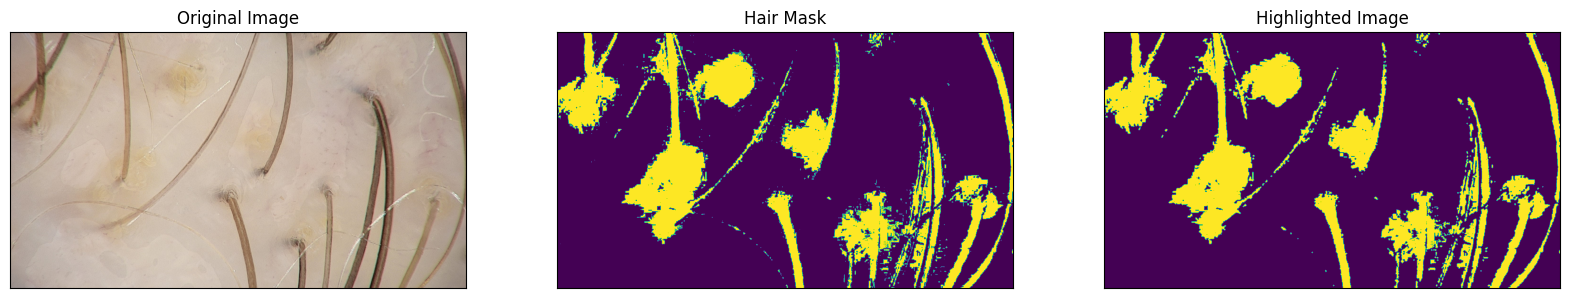

In [45]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the image
image_path = "./łysienie/03945.jpg"
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to LAB color space to enhance yellow color separation
lab_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Thresholding on the B channel to isolate yellow areas (yellow has high B values)
# _, yellow_mask = cv2.threshold(b_channel, 143, 255, cv2.THRESH_BINARY)
yellow_mask = cv2.inRange(b_channel, 143, 160)

# Morphological operations to clean the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
yellow_mask_cleaned = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours of the yellow dots
contours, _ = cv2.findContours(yellow_mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Draw circles around detected yellow dots
# output_image = np.array(image).copy()
# for cnt in contours:
#     (x, y), radius = cv2.minEnclosingCircle(cnt)
#     if radius > 1:  # filter out very small dots
#         cv2.circle(output_image, (int(x), int(y)), int(radius), (255, 0, 0), 2)

# # original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# rgb_output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(yellow_mask)
plt.title('Hair Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(yellow_mask_cleaned)
plt.title('Highlighted Image'), plt.xticks([]), plt.yticks([])

# comparison of lower threshold

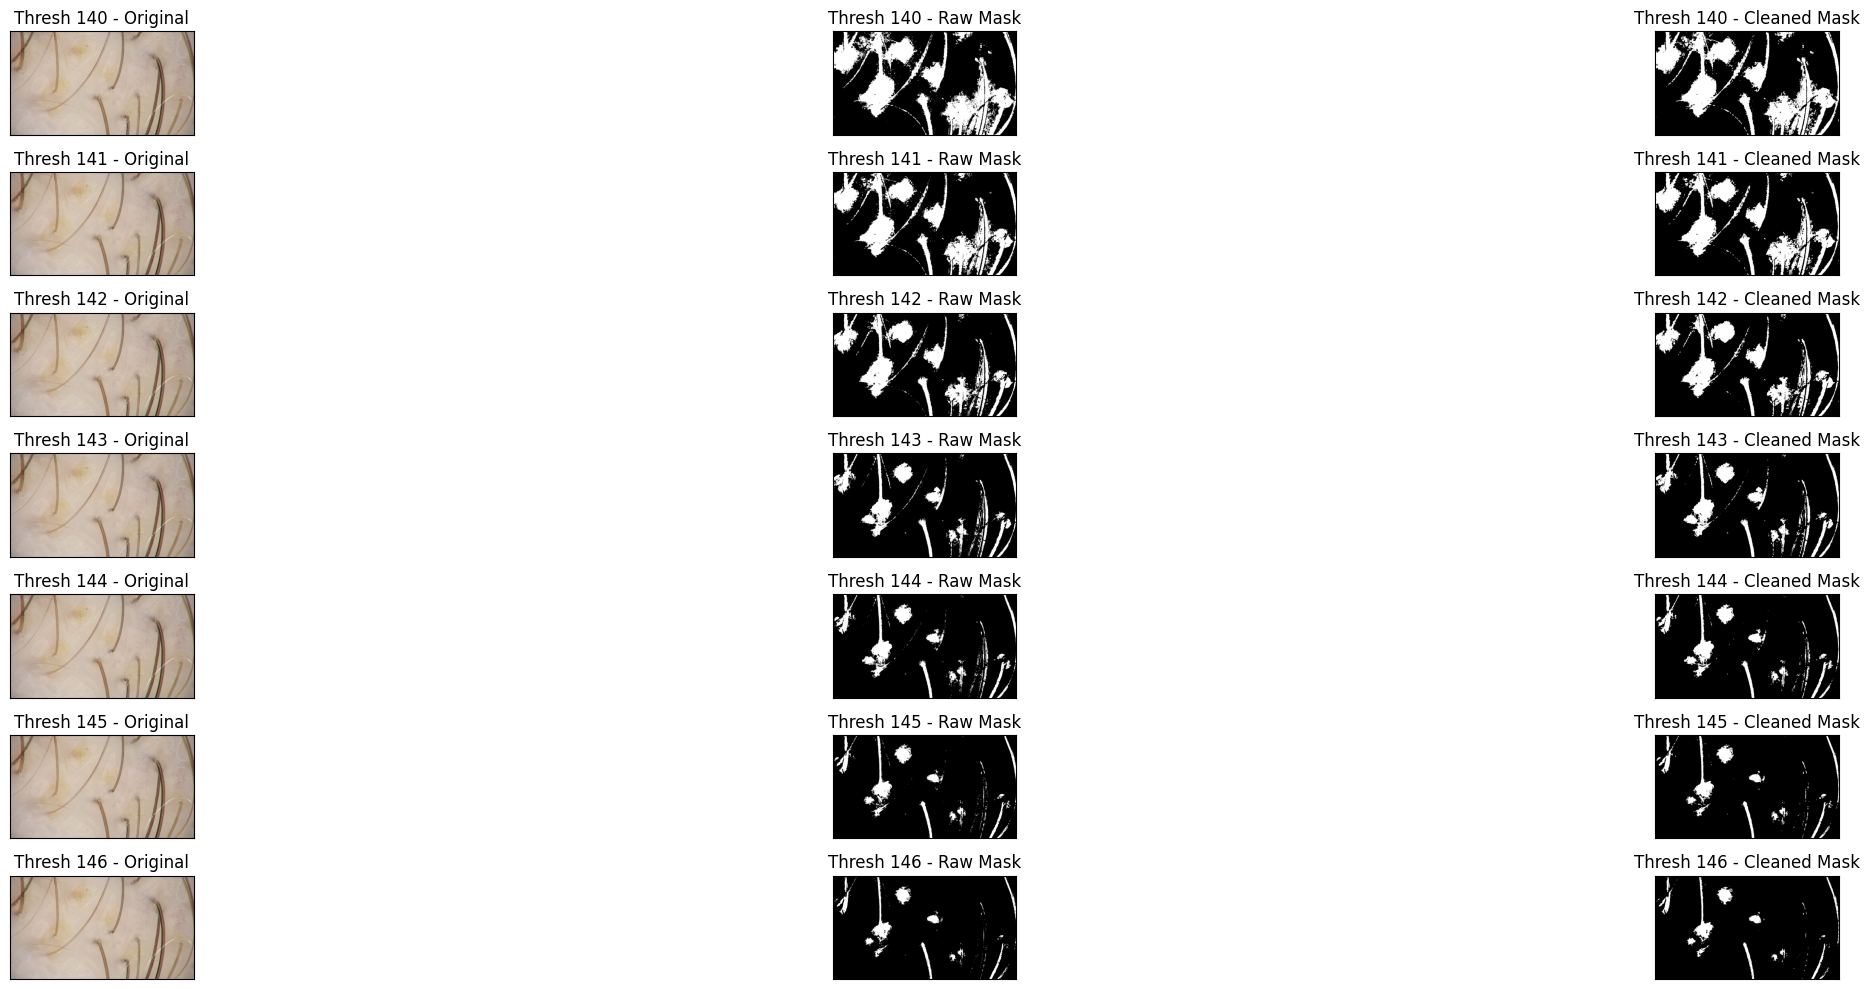

In [46]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the image
image_path = "./łysienie/03945.jpg"
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to LAB color space to enhance yellow color separation
lab_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

thresholds = [140, 141, 142, 143, 144, 145, 146]
# thresholds = [140, 141]
masks = []

for threshold in thresholds:
    # Thresholding on the B channel
    _, yellow_mask = cv2.threshold(b_channel, threshold, 255, cv2.THRESH_BINARY)

    # Morphological cleaning
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    yellow_mask_cleaned = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel, iterations=2)

    # Store the masks for visualization
    masks.append((yellow_mask, yellow_mask_cleaned))

# Plot the original image with corresponding masks
plt.figure(figsize=(30, 10))
for i, threshold in enumerate(thresholds):
    plt.subplot(len(thresholds), 3, i*3 + 1)
    plt.imshow(image)
    plt.title(f'Thresh {threshold} - Original')
    plt.xticks([]), plt.yticks([])

    plt.subplot(len(thresholds), 3, i*3 + 2)
    plt.imshow(masks[i][0], cmap='gray')
    plt.title(f'Thresh {threshold} - Raw Mask')
    plt.xticks([]), plt.yticks([])

    plt.subplot(len(thresholds), 3, i*3 + 3)
    plt.imshow(masks[i][1], cmap='gray')
    plt.title(f'Thresh {threshold} - Cleaned Mask')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

(Text(0.5, 1.0, 'Highlighted Image'), ([], []), ([], []))

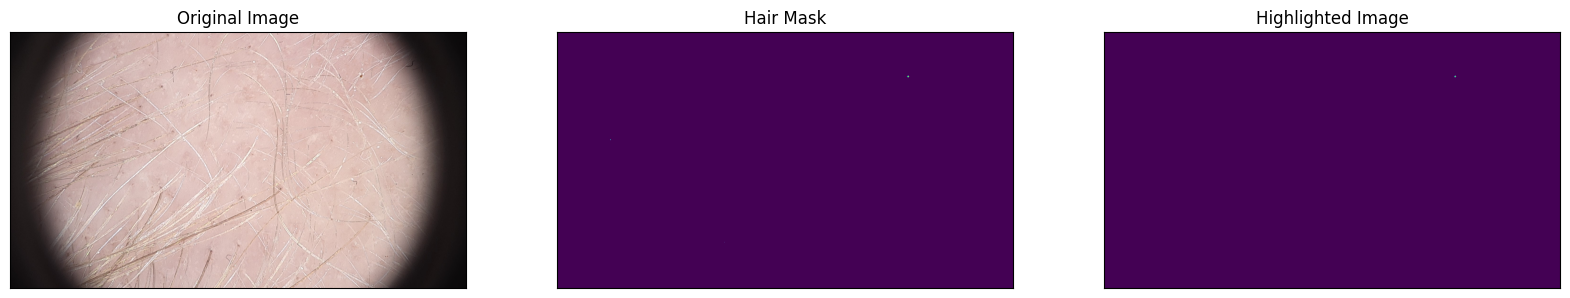

In [21]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the image
image_path = "./łysienie/02144.jpg"
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to LAB color space to enhance yellow color separation
lab_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Thresholding on the B channel to isolate yellow areas (yellow has high B values)
_, yellow_mask = cv2.threshold(b_channel, 148, 255, cv2.THRESH_BINARY)

# Morphological operations to clean the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
yellow_mask_cleaned = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours of the yellow dots
contours, _ = cv2.findContours(yellow_mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Draw circles around detected yellow dots
# output_image = np.array(image).copy()
# for cnt in contours:
#     (x, y), radius = cv2.minEnclosingCircle(cnt)
#     if radius > 1:  # filter out very small dots
#         cv2.circle(output_image, (int(x), int(y)), int(radius), (255, 0, 0), 2)

# # original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# rgb_output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Show the result
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(yellow_mask)
plt.title('Hair Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(yellow_mask_cleaned)
plt.title('Highlighted Image'), plt.xticks([]), plt.yticks([])

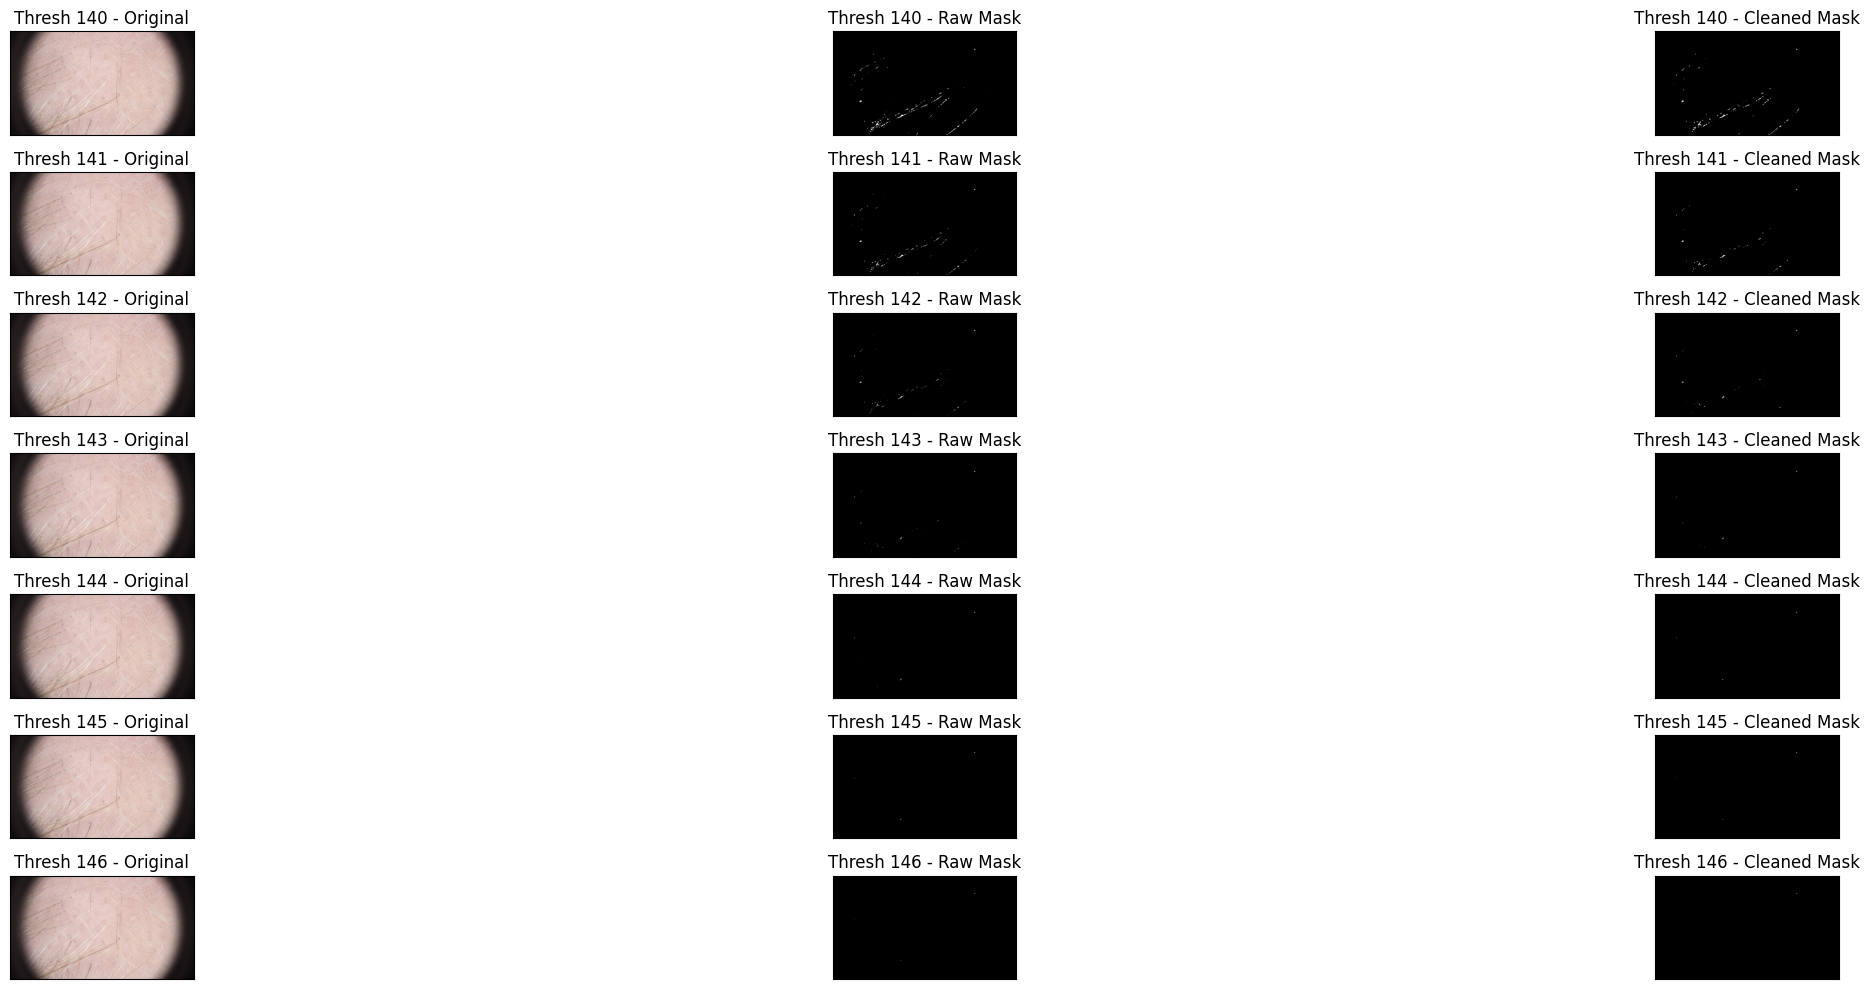

In [32]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the image
image_path = "./łysienie/02144.jpg"
image = Image.open(image_path)
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to LAB color space to enhance yellow color separation
lab_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

thresholds = [140, 141, 142, 143, 144, 145, 146]
# thresholds = [140, 141]
masks = []

for threshold in thresholds:
    # Thresholding on the B channel
    _, yellow_mask = cv2.threshold(b_channel, threshold, 255, cv2.THRESH_BINARY)

    # Morphological cleaning
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    yellow_mask_cleaned = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel, iterations=2)

    # Store the masks for visualization
    masks.append((yellow_mask, yellow_mask_cleaned))

# Plot the original image with corresponding masks
plt.figure(figsize=(30, 10))
for i, threshold in enumerate(thresholds):
    plt.subplot(len(thresholds), 3, i*3 + 1)
    plt.imshow(image)
    plt.title(f'Thresh {threshold} - Original')
    plt.xticks([]), plt.yticks([])

    plt.subplot(len(thresholds), 3, i*3 + 2)
    plt.imshow(masks[i][0], cmap='gray')
    plt.title(f'Thresh {threshold} - Raw Mask')
    plt.xticks([]), plt.yticks([])

    plt.subplot(len(thresholds), 3, i*3 + 3)
    plt.imshow(masks[i][1], cmap='gray')
    plt.title(f'Thresh {threshold} - Cleaned Mask')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

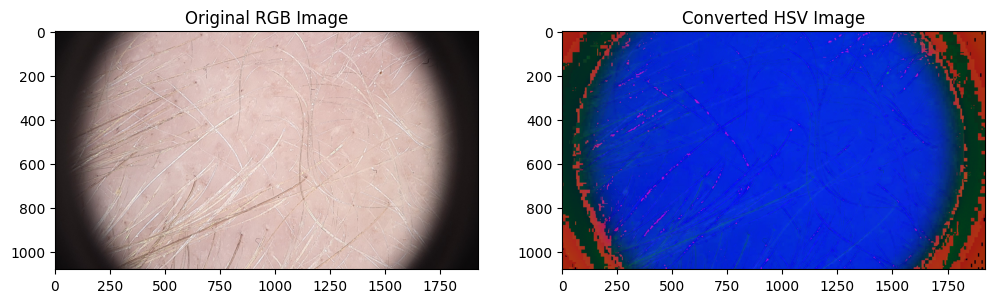

In [1]:
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv_and_plot(image_path):
    # Read the image in RGB format
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or path is incorrect.")

    # Convert the image from BGR to RGB (OpenCV reads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image from RGB to HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Plot the original RGB image and the HSV image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('Original RGB Image')
    plt.subplot(1, 2, 2), plt.imshow(image_hsv), plt.title('Converted HSV Image')
    plt.show()

# Example usage
image_path = './łysienie/02144.jpg'
rgb_to_hsv_and_plot(image_path)